<a href="http://www.unioeste.br"><img src="https://www5.unioeste.br/portalunioeste/templates/tlpcampus/images/logoUnioeste.png" align="right"></a>

<h1><center>Atividade Prática em R - Medidas de Posição Central, Quantis Amostrais e Box Plots</center></h1>

<center>Prof.Dr. Plinio Andrade</center>

Neste roteiro prático você aprenderá a utilizar o R para:

* Calcular a mediana e a média dos dados;
* Calcular quantis amostrais de qualquer ordem e o diagrama dos cinco números;
* Obter gráficos de quantis;
* Obter box plots.

<b> <font color='red'>ATENÇÃO!</font></b> sempre que este arquivo for reaberto você deverá executar todas as células de código novamente. Cada célula ativa é executada pressionando o botão <b>Run</b> no menu ou teclando <b>Ctrl+Enter</b> (persistindo dúvidas, assista a videoaula de apresentação sobre notebooks).

Caso necessite criar mais células de código, basta ir ao menu Insert.

Vamos carregar novamente os dados da Cia. MB. Execute a célula a seguir:

In [ ]:
arquivo = url('https://www.ime.usp.br/~pam/dados.RData') # armazenamos o endereço eletrônico numa variável chamada arquivo
load(arquivo)                                            # carregando o arquivo
attach(tab2_1)  

## 1) Medidas de Posição

### 1.1) Mediana

A mediana é calculada facilmente no R por meio da função ```median()```. Tal função só funciona com dados numéricos. Vamos calcular a mediana da variável **salário**. Execute a célula a seguir:

In [ ]:
median(salario)

Observe novamente a tabela que contém os dados da Cia. MB (tabela 2.1). Note que a variável **número de filhos** possui entradas do tipo ```NA``` (not available), ou seja, por alguma razão alguns empregados não responderam quantos filhos possuem. Podemos utilizar o argumento ```na.rm = TRUE``` em várias funções do R para eliminar essas entradas faltantes e calcular medidas levando em conta apenas os valores informados. Execute a célula a seguir:

In [ ]:
median(n_filhos)                # erro!

In [ ]:
median(n_filhos, na.rm = TRUE)  # ok!

### Exercício 1
Obtenha a mediana para a variável **idade** (em anos)

### 1.2) Média
Assim como no caso da mediana, o R fornece um função simples para o cálculo de médias. A sintaxe de tal função é ```mean()```. Novamente, podemos eliminar dados faltantes por meio do argumento ```na.rm = TRUE```. Vamos obter a média da variável **salário**. Execute a célula a seguir:

In [ ]:
mean(salario)

A média aparada ou truncada pode ser calculada inserindo o argumento ```trim = alpha```, em que ```alpha``` é a fração das maiores e menores observações a serem aparadas (um valor entre 0 e 0,5). Execute a célula a seguir e compare com o resultado anterior:

In [ ]:
mean(salario, trim = 0.1) # média aparada com alpha = 0,1

### Exercício 2
Calcule a média das variáveis **idade** (em anos) e **número de filhos** para os dados da Cia. MB (cuidado com os dados faltantes).

## 2) Quantis Amostrais

Quantis amostrais são calculados no R por meio da função ```quantile()```. Devemos informar a variável em estudo e a ordem (proporção) desejada. O software R possui 9 algoritmos diferentes para calcular quantis. O método apresentado em aula é o 6º algoritmo. Assim, para comparar com os resultados obtidos em aula, devemos informar qual algoritmo o R deve utilizar. Isso é feito inserindo o argumento ```type = 6```.


Por exemplo, considere o seguinte conjunto de dados (o mesmo utilizado em aula)

$$15 \ \ \  5 \ \ \  3 \ \ \  8 \ \ \  10 \ \ \  2 \ \ \  7 \ \ \  11 \ \ \  12$$

Vamos obter o valor de $q(0,20)$, ou seja, o quantil de ordem $0,20$ ou o decil de $20\%$. Execute a célula a seguir:

In [ ]:
x = c(15,5,3,8,10,2,7,11,12)    # armazenando os dados
quantile(x, 0.2, type = 6)      # calculando o quantil

Caso o tipo do algoritmo não seja informado, o R irá utilizar a versão padrão da função. Todos os demais exemplos serão feitos utilizando essa versão padrão.

In [ ]:
quantile(x, 0.2)

Considere os conjuntos de dados apresentados em aula sobre o nível de albumina no sangue de 60 pessoas (em g/dL):

| 4,44 | 4,47 | 4,48 | 4,51 | 4,54 | 4,54 | 4,61 | 4,64 | 4,66 | 4,68 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 4,68 | 4,69 | 4,71 | 4,73 | 4,76 | 4,76 | 4,76 | 4,81 | 4,86 | 4,86 |
| 4,87 | 4,88 | 4,90 | 4,90 | 4,95 | 4,95 | 4,96 | 4,97 | 4,98 | 4,98 |
| 4,99 | 5,00 | 5,01 | 5,01 | 5,01 | 5,02 | 5,04 | 5,05 | 5,08 | 5,09 |
| 5,09 | 5,10 | 5,11 | 5,11 | 5,16 | 5,17 | 5,18 | 5,18 | 5,19 | 5,24 |
| 5,24 | 5,26 | 5,27 | 5,27 | 5,29 | 5,32 | 5,35 | 5,46 | 5,50 | 5,85 |

Vamos armazenar esses dados em um objeto adequado para uso posterior. Execute a célula a seguir:

In [ ]:
alb = c(444,447,448,451,454,454,461,464,466,468,468,469,471,473,476,476,476,481,486,486,487,488,490,490,495,495,496,497,498,498,499,500,501,501,501,502,504,505,508,509,509,510,511,511,516,517,518,518,519,524,524,526,527,527,529,532,535,546,550,585)
alb = alb/100
alb

### Exercício 3
Calcule o quantil de ordem $p=0,44$ a variável **nível de albumina no sangue**.

## 3) Gráficos de quantis

Para obter gráficos de quantis, devemos primeiro criar uma sequência de valores de $p$ no intervalo $[0,1]$ e que serão dispostos no eixo das abscissas (horizontal). Vamos armazenar esses valores no vetor ```props```. Você pode utilizar sempre a mesma sequência em suas aplicações, mas caso queira mais ou menos pontos, basta alterar o argumento que define o tamanho do salto no comando abaixo. Execute a célula a seguir:

In [ ]:
# Criando uma sequência de proporções que começa em 0 e termina em 1 com saltos de tamanho 0,05
# Tal sequência será armazenada no vetor "props"
props = seq(0, 1, 0.05)
props

Vamos agora calcular os quantis correspondentes para a variável **nível de albumina no sangue** e armazená-los no vetor ```quant```. Execute a célula a seguir:

In [ ]:
quant = quantile(alb,props)
quant

Agora podemos criar o gráfico por meio da função ```plot()```. Execute a célula a seguir:

In [ ]:
plot(props, quant) # valores em x como props e valores em y como quant

### Exercício 4
O tempo (em meses) entre a remissão de uma doença e a recidiva de 48 pacientes de uma determinada clínica médica foi registrado. Os dados ordenados são apresentados a seguir, separadamente para os sexos masculino (M) e feminino (F):

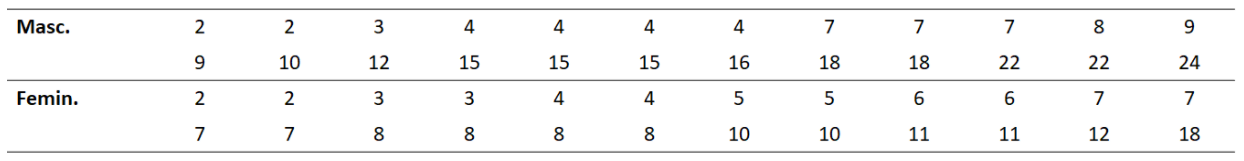

Obtenha os gráficos de quantis para cada grupo (masculino e feminino) e argumente sobre a simetria dos dados (escreva seus argumentos em uma célula sem executá-la)

## 4) Diagrama dos Cinco Números

O **diagrama dos cinco números** visto em aula é obtido facilmente no R por meio da funcão ```summary()```. Na verdade o R fornece seis valores, pois informa também a média. Execute a célula a seguir para obter este diagrama para a variável **nível de albumina no sangue**:

In [ ]:
summary(alb)

### Exercício 5

Considere novamente os dados dos exercício anterior. Obtenha os diagramas dos cinco números para cada grupo (masculino e feminino).

## 5) Box Plot

Obtemos um box plot no R utilizando a função ```boxplot()```; basta informar a variável em estudo ou, caso queira realizar uma comparação,  informar as várias variáveis separadas por vírgula.

Vamos obter o box plot da variável **nível de albumina no sangue**. Execute a célula a seguir:

In [ ]:
boxplot(alb)

Podemos agrupar vários box plots em um único gráfico, informando todas as variáveis na função ```boxplot()```. Execute e observe o resultado do seguinte código:

In [ ]:
boxplot(idade_anos, salario, n_filhos, names = c("idade (anos)", "salário", "nº de filhos"))

### Exercício 6

Considere os dados do exercício 4. Obtenha simultaneamente os box plots dos dois grupos (masculino e feminino) interpretando-os em seguida.

## Parabéns, você concluiu este roteiro prático!

<b> <font color='red'>ATENÇÃO! Imprima o conteúdo deste notebook para enventuais consultas futuras, pois assim que o navegador for fechado os códigos serão apagados. Para imprimir, tecle Ctrl+P e salve como um arquivo PDF.</font></b>